In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt5
# matplotlib.use('Agg')

In [77]:
    patient_id =10
    path_unet = '/media/czey/Elements/0_test_validation_v2/test_unet'
    path_pix2pix = '/media/czey/Elements/0_test_validation_v2/test_pix2pix'
    path_cyclegan = '/media/czey/Elements/0_test_validation_v2/test_cyclegan'
    path_LIMAR = '/home/czey/generative_inpainting/CTarms_201116/npytodoTPS/LIMAR'
    path_NMAR = '/home/czey/generative_inpainting/CTarms_201116/npytodoTPS/NMAR'
    patient_names = sorted(os.listdir(path_unet))
    patient_path = os.path.join(path_unet, patient_names[patient_id])
    npy_names = sorted(os.listdir(patient_path))
    realA_names = [x for x in npy_names if 'realA.npy' in x]
    realB_names = [x for x in npy_names if 'realB.npy' in x]
    fakeB_names = [x for x in npy_names if 'fakeB.npy' in x]
    # realA_names

    imgs_realA=[]
    imgs_realB = []
    unet256_fakeBs = []
    pix2pix_fakeBs = []
    cyclegan_fakeBs = []
    LIMAR_fakeBs = []
    NMAR_fakeBs = []

    for realA, realB, fakeB in zip(realA_names, realB_names, fakeB_names): 
    #     print(realA)
        img_realA = np.load(os.path.join(path_unet, patient_names[patient_id], realA))
        img_realB = np.load(os.path.join(path_unet, patient_names[patient_id], realB))
        unet256_fakeB = np.load(os.path.join(path_unet, patient_names[patient_id], fakeB))
        pix2pix_fakeB = np.load(os.path.join(path_pix2pix, patient_names[patient_id], fakeB))
        cyclegan_fakeB = np.load(os.path.join(path_cyclegan, patient_names[patient_id], fakeB))
        LIMAR_fakeB = np.load(os.path.join(path_LIMAR, patient_names[patient_id], fakeB[:5]+'.npy'))
        NMAR_fakeB = np.load(os.path.join(path_NMAR, patient_names[patient_id], fakeB[:5]+'.npy'))

        img_realA = (np.squeeze(img_realA,1) + 1) /2 * 4095
        img_realB = (np.squeeze(img_realB,1) + 1) /2 * 4095
        unet256_fakeB = (np.squeeze(unet256_fakeB,1) + 1) /2 * 4095
        pix2pix_fakeB = (np.squeeze(pix2pix_fakeB,1) + 1) /2 * 4095
        cyclegan_fakeB = (np.squeeze(cyclegan_fakeB,1) + 1) /2 * 4095
        LIMAR_fakeB = np.expand_dims(LIMAR_fakeB, 0)
        NMAR_fakeB = np.expand_dims(NMAR_fakeB, 0)

        imgs_realA.append(img_realA)
        imgs_realB.append(img_realB)
        unet256_fakeBs.append(unet256_fakeB)  
        pix2pix_fakeBs.append(pix2pix_fakeB)
        cyclegan_fakeBs.append(cyclegan_fakeB)
        LIMAR_fakeBs.append(LIMAR_fakeB)
        NMAR_fakeBs.append(NMAR_fakeB)

    imgs_realA = np.vstack(imgs_realA)
    imgs_realB = np.vstack(imgs_realB)
    unet256_fakeBs = np.vstack(unet256_fakeBs)
    pix2pix_fakeBs = np.vstack(pix2pix_fakeBs)
    cyclegan_fakeBs = np.vstack(cyclegan_fakeBs)
    LIMAR_fakeBs = np.vstack(LIMAR_fakeBs)
    NMAR_fakeBs = np.vstack(NMAR_fakeBs)
    print("patient_id: ", patient_id)

(1, 512, 512)


(301, 512, 512)

Text(0.5, 1.0, 'cyclegan-realB')

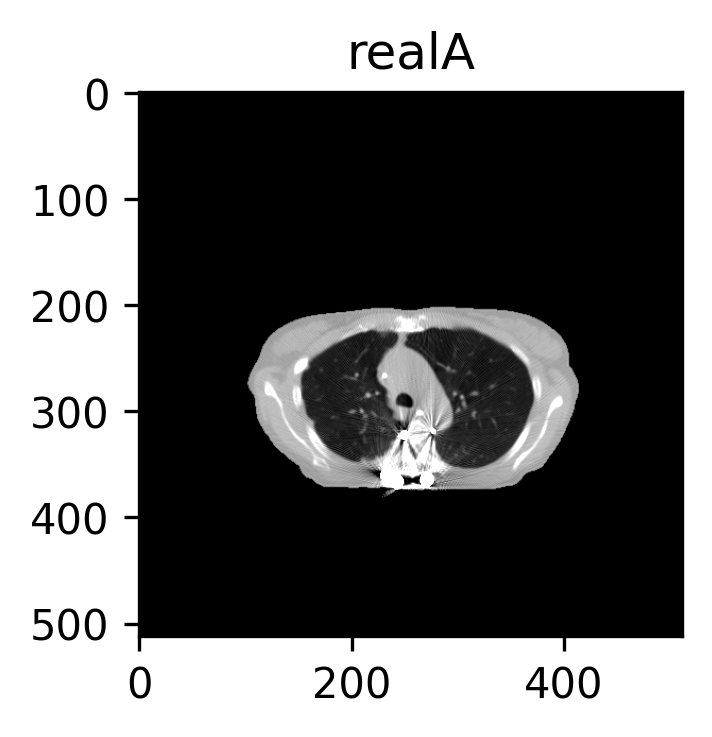

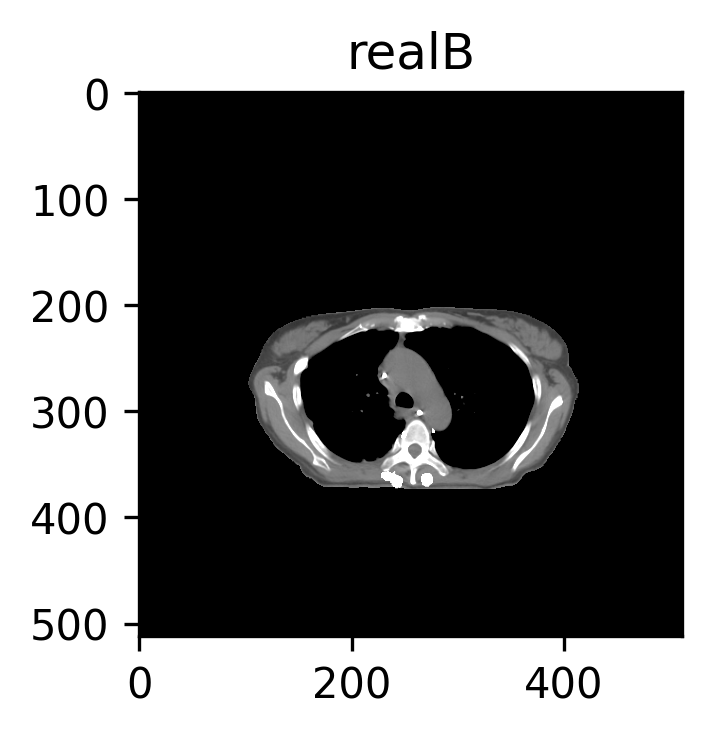

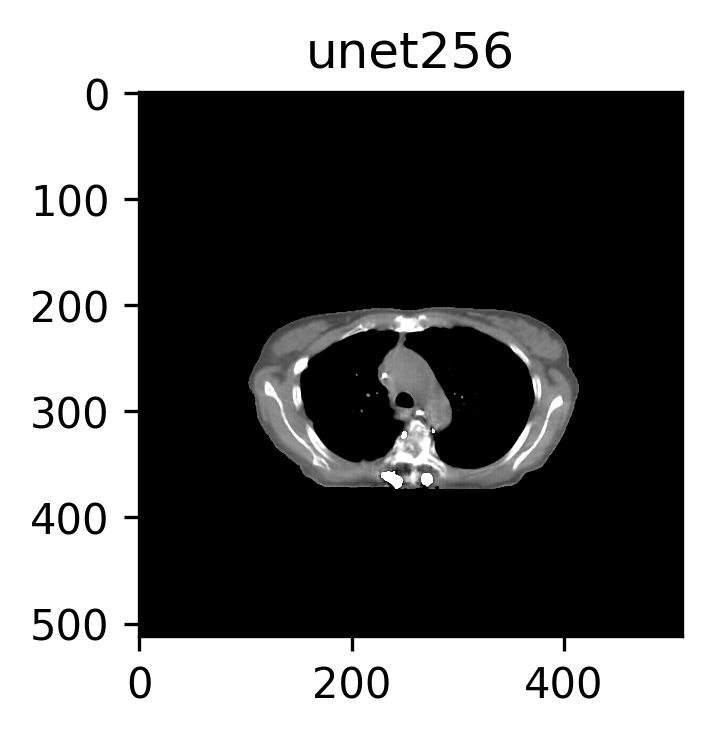

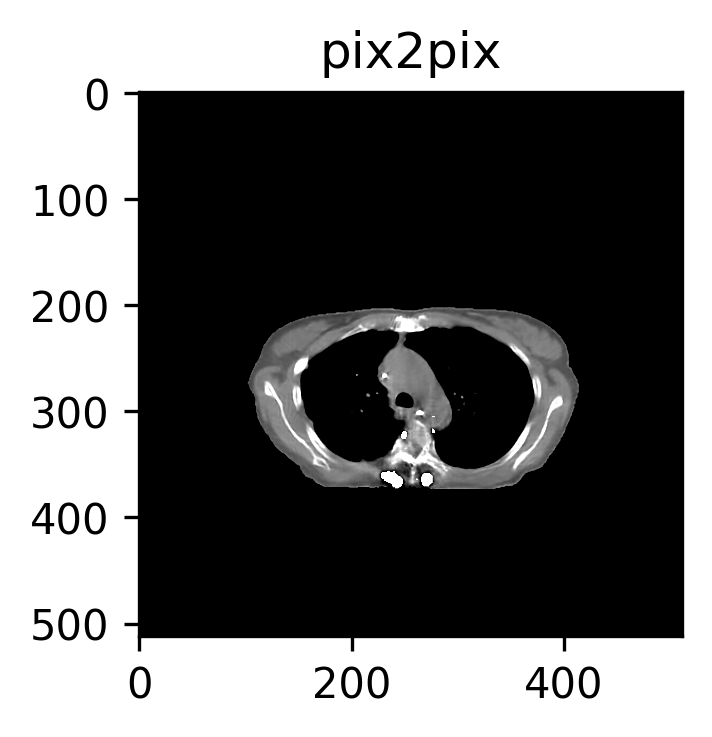

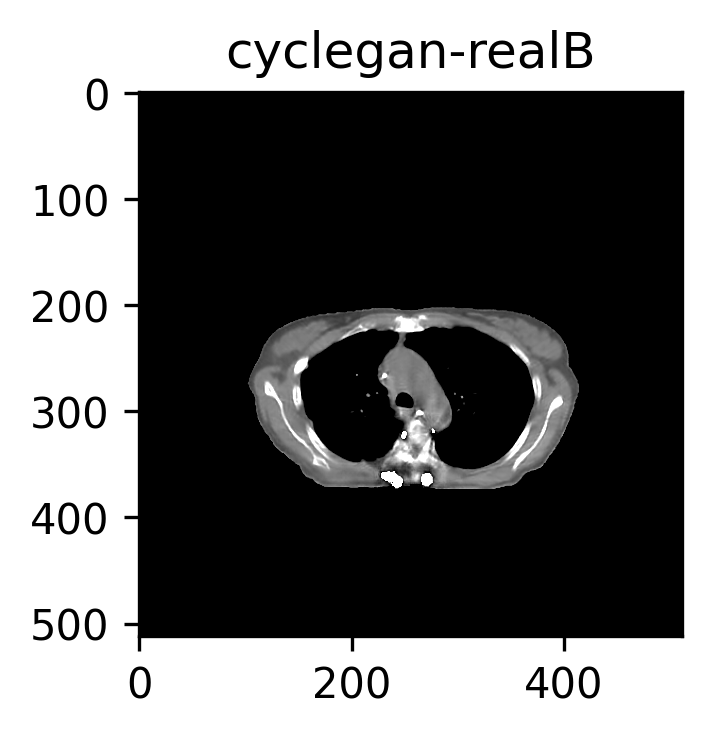

In [81]:
i=50
# img_origin[i,:,:,0][img_origin[i,:,:,0]>4000]=4000
fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(imgs_realA[i,:,:],vmax=1500,cmap='gray')
plt.title('realA')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(imgs_realB[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('realB')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(unet256_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('unet256')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(pix2pix_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('pix2pix')
# plt.savefig('method_result_compare/%03d_2metal.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(cyclegan_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('cyclegan')
# plt.savefig('method_result_compare/%03d_3LIMAR.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(unet256_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('unet256-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(pix2pix_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('pix2pix-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(cyclegan_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
plt.title('cyclegan-realB')
# plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

In [58]:
path_unet256 = 'test_validation_old/validation_unet/Y180124'
path_pix2pix = 'test_validation_old/validation_pix2pix/Y180124'
path_cyclegan = 'test_validation_old/validation_cycle_gan/Y180124'
names = sorted(os.listdir(path_unet256))
realA_names = [x for x in names if 'realA.npy' in x]
realB_names = [x for x in names if 'realB.npy' in x]
fakeB_names = [x for x in names if 'fakeB.npy' in x]
# fakeB_names

imgs_realA=[]
imgs_realB = []
unet256_fakeBs = []
pix2pix_fakeBs = []
cyclegan_fakeBs = []

for realA, realB, fakeB in zip(realA_names, realB_names, fakeB_names):    
    np.squeeze
    img_realA = np.load(os.path.join(path_unet256, realA))
    img_realB = np.load(os.path.join(path_unet256, realB))
    unet256_fakeB = np.load(os.path.join(path_unet256, fakeB))
    pix2pix_fakeB = np.load(os.path.join(path_pix2pix, fakeB))
    cyclegan_fakeB = np.load(os.path.join(path_cyclegan, fakeB))
    
    img_realA = (np.squeeze(img_realA,1) + 1) /2 * 4095
    img_realB = (np.squeeze(img_realB,1) + 1) /2 * 4095
    unet256_fakeB = (np.squeeze(unet256_fakeB,1) + 1) /2 * 4095
    pix2pix_fakeB = (np.squeeze(pix2pix_fakeB,1) + 1) /2 * 4095
    cyclegan_fakeB = (np.squeeze(cyclegan_fakeB,1) + 1) /2 * 4095
    
    imgs_realA.append(img_realA)
    imgs_realB.append(img_realB)
    unet256_fakeBs.append(unet256_fakeB)  
    pix2pix_fakeBs.append(pix2pix_fakeB)
    cyclegan_fakeBs.append(cyclegan_fakeB)
#     break

print(unet256_fakeB.shape)

imgs_realA = np.vstack(imgs_realA)
imgs_realB = np.vstack(imgs_realB)
unet256_fakeBs = np.vstack(unet256_fakeBs)
pix2pix_fakeBs = np.vstack(pix2pix_fakeBs)
cyclegan_fakeBs = np.vstack(cyclegan_fakeBs)
unet256_fakeBs.shape

(1, 512, 512)


(96, 512, 512)

Text(0.5, 1.0, 'cyclegan-realB')

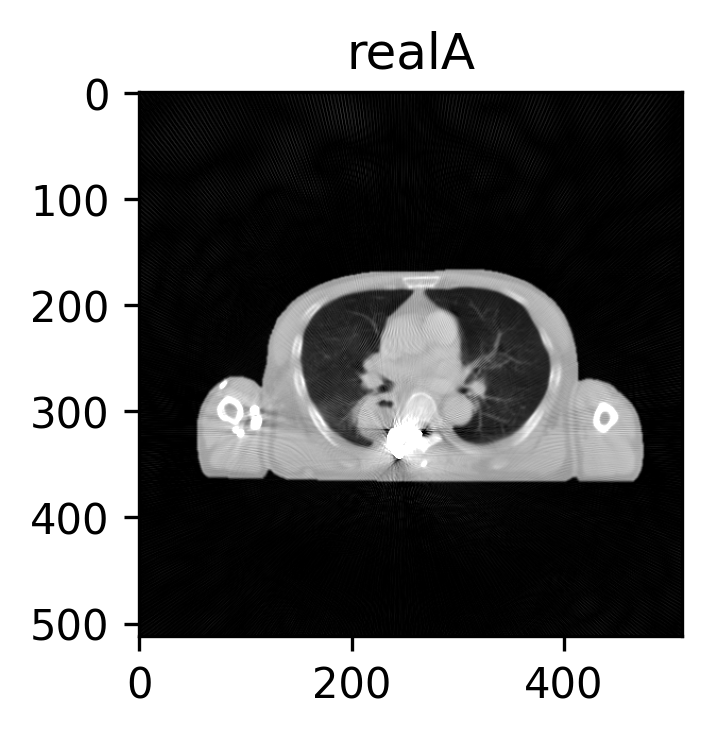

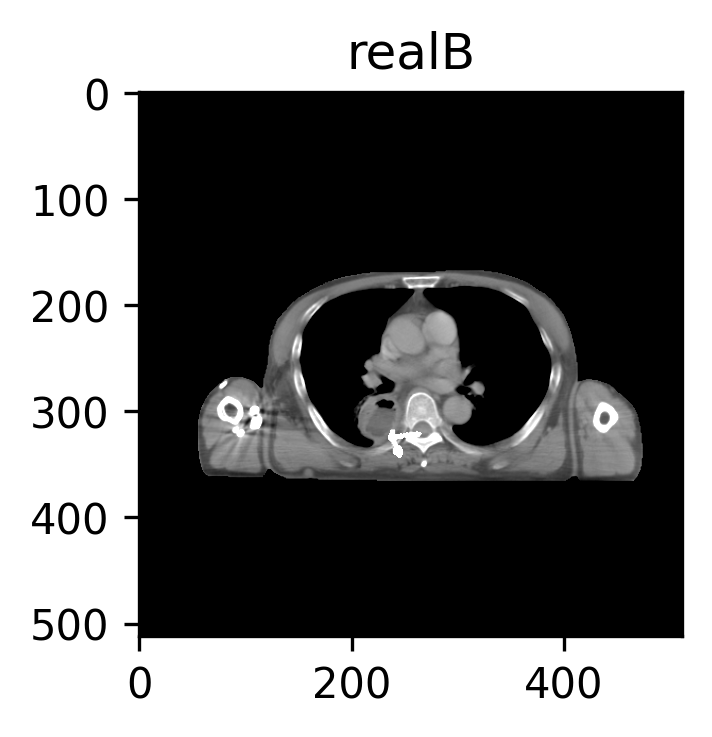

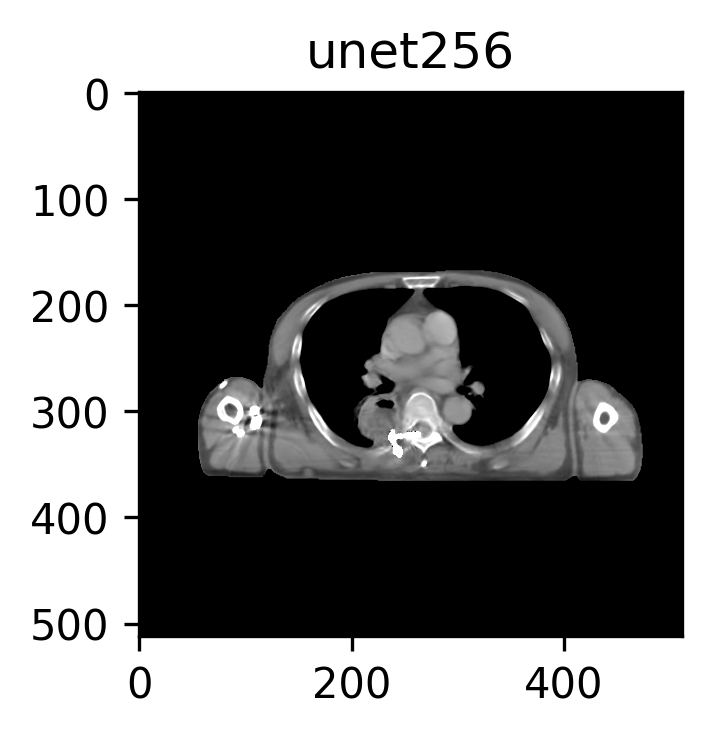

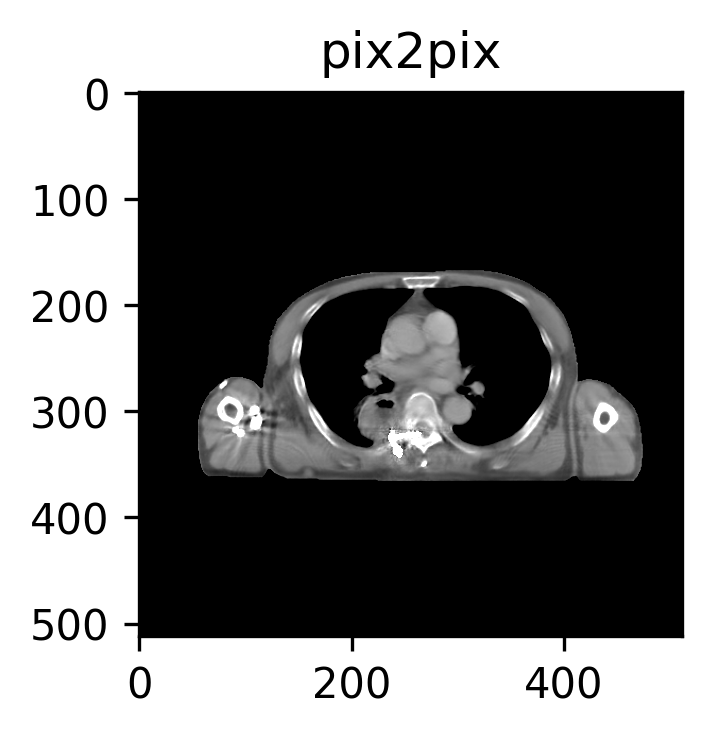

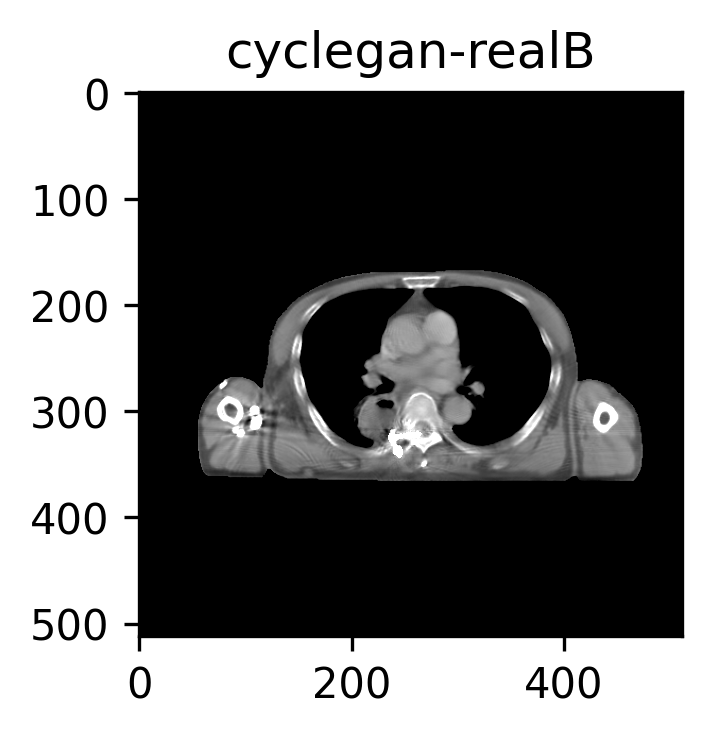

In [74]:
i=13
# img_origin[i,:,:,0][img_origin[i,:,:,0]>4000]=4000
fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(imgs_realA[i,:,:],vmax=1500,cmap='gray')
plt.title('realA')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(imgs_realB[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('realB')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(unet256_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('unet256')
# plt.savefig('method_result_compare/%03d_1origin.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(pix2pix_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('pix2pix')
# plt.savefig('method_result_compare/%03d_2metal.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
plt.imshow(cyclegan_fakeBs[i,:,:],vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.title('cyclegan')
# plt.savefig('method_result_compare/%03d_3LIMAR.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(unet256_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('unet256-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(pix2pix_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('pix2pix-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(3.2,2.4), dpi=300)
# plt.imshow(cyclegan_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
plt.title('cyclegan-realB')
# plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

In [15]:
img_pix2pix_all=np.int16(img_pix2pix_all)
np.save('img_pix2pix_all.npy',img_pix2pix_all)

In [7]:
# img_pred_all_array[img_pred_all_array>3900]=9000

In [49]:
i=49
# img_origin[i,:,:,0][img_origin[i,:,:,0]>4000]=4000
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_origin_all[i,:,:,0],vmin=500,vmax=2000,cmap='gray')
plt.title('img_origin')

Text(0.5, 1.0, 'img_origin')

In [19]:
(img_pix2pix_all[i,:,:,0]-img_origin_all[i,:,:,0]).flatten().mean()

-5.570781707763672

In [18]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_LIMAR_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_LIMAR-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [19]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_NMAR_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_NMAR-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [20]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_unet_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_unet-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [21]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_pix2pix_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_pix2pix-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


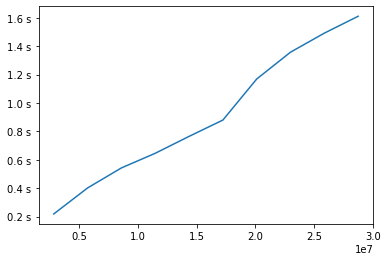

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
x = [i * 2872155 for i in range(1, 11)]
y = [0.219, 0.402,  0.543,  0.646,0.765,  0.880,1.169, 1.358,1.492,1.611]

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
plt.plot(x, y)


In [6]:
# import cv2 as cv
# from skimage.metrics import structural_similarity as ssim
# img_origin_all=np.vstack(img_origin_all)
# img_metal_all=np.vstack(img_metal_all)
# img_unet_all=np.vstack(img_unet_all)
# img_pix2pix_all=np.vstack(img_pix2pix_all)


# print(img_origin_all.shape)
# print(img_metal_all.shape)
# print(img_unet_all.shape)
# print(img_pix2pix_all.shape)

In [33]:
import numpy as np
from skimage.metrics import mean_squared_error as mse
# from skimage.measure import compare_mse as mse2
from skimage.metrics import normalized_root_mse as nrm
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
def mae(img1, img2):
    mae = np.mean( abs(img1 - img2)  )
    return mae

In [42]:
mae(unet256_fakeBs[0,:,:], imgs_realB[0,:,:])

3.0999534

In [43]:
mae(imgs_realA[0,:,:], imgs_realB[0,:,:])

32.70208

In [16]:
# imgs_num = img_origin_all.shape[0]
# ssim_metal = np.zeros(imgs_num)
# ssim_LIMAR = np.zeros(imgs_num)
# ssim_NMAR = np.zeros(imgs_num)
# ssim_unet = np.zeros(imgs_num)
# ssim_pix2pix = np.zeros(imgs_num)

# for i in range(imgs_num):
#     image_origin=img_origin_all[i,:,:,0]
#     image_metal=img_metal_all[i,:,:,0]
#     image_LIMAR=img_LIMAR_all[i,:,:,0]
#     image_NMAR=img_NMAR_all[i,:,:,0]
#     image_unet=img_unet_all[i,:,:,0]
#     image_pix2pix=img_pix2pix_all[i,:,:,0]
#     ssim_metal[i] = ssim(image_origin, image_metal)
#     ssim_LIMAR[i] = ssim(image_origin, image_LIMAR)
#     ssim_NMAR[i] = ssim(image_origin, image_NMAR)
#     ssim_unet[i] = ssim(image_origin, image_unet)
#     ssim_pix2pix[i] = ssim(image_origin, image_pix2pix)
# ssim_metal_total=ssim_metal.mean()
# ssim_LIMAR_total=ssim_LIMAR.mean()
# ssim_NMAR_total=ssim_NMAR.mean()
# ssim_unet_total=ssim_unet.mean()
# ssim_pix2pix_total=ssim_pix2pix.mean()
print(ssim_metal_total-1)
print(ssim_LIMAR_total-1)
print(ssim_NMAR_total-1)
print(ssim_unet_total-1)
print(ssim_pix2pix_total-1)

-7.595035711460696e-13
-5.220268661787486e-13
-4.934941344458821e-13
-7.893685705084863e-14
-7.138734048339757e-14


In [12]:
imgs_num = img_origin_all.shape[0]
mse_metal = np.zeros(imgs_num)
mse_LIMAR = np.zeros(imgs_num)
mse_NMAR = np.zeros(imgs_num)
mse_unet = np.zeros(imgs_num)
mse_pix2pix = np.zeros(imgs_num)

for i in range(imgs_num):
    image_origin=img_origin_all[i,:,:,0]
    image_metal=img_metal_all[i,:,:,0]
    image_LIMAR=img_LIMAR_all[i,:,:,0]
    image_NMAR=img_NMAR_all[i,:,:,0]
    image_unet=img_unet_all[i,:,:,0]
    image_pix2pix=img_pix2pix_all[i,:,:,0]
    mse_metal[i] = mse(image_origin, image_metal)
    mse_LIMAR[i] = mse(image_origin, image_LIMAR)
    mse_NMAR[i] = mse(image_origin, image_NMAR)
    mse_unet[i] = mse(image_origin, image_unet)
    mse_pix2pix[i] = mse(image_origin, image_pix2pix)
mse_metal_total=mse_metal.mean()
mse_LIMAR_total=mse_LIMAR.mean()
mse_NMAR_total=mse_NMAR.mean()
mse_unet_total=mse_unet.mean()
mse_pix2pix_total=mse_pix2pix.mean()
print(mse_metal_total)
print(mse_LIMAR_total)
print(mse_NMAR_total)
print(mse_unet_total)
print(mse_pix2pix_total)

3162.5179590117496
2539.8012413709266
2812.38240554404
717.6120203594829
692.1421995321382


In [11]:
ssim_metal = np.zeros(5)
ssim_metal[0]

0.0

In [17]:
imgs_num = img_origin_all.shape[0]
mae_metal = np.zeros(imgs_num)
mae_LIMAR = np.zeros(imgs_num)
mae_NMAR = np.zeros(imgs_num)
mae_unet = np.zeros(imgs_num)
mae_pix2pix = np.zeros(imgs_num)

for i in range(imgs_num):
    image_origin=img_origin_all[i,:,:,0]
    image_metal=img_metal_all[i,:,:,0]
    image_LIMAR=img_LIMAR_all[i,:,:,0]
    image_NMAR=img_NMAR_all[i,:,:,0]
    image_unet=img_unet_all[i,:,:,0]
    image_pix2pix=img_pix2pix_all[i,:,:,0]
    mae_metal[i] = mae(image_origin, image_metal)
    mae_LIMAR[i] = mae(image_origin, image_LIMAR)
    mae_NMAR[i] = mae(image_origin, image_NMAR)
    mae_unet[i] = mae(image_origin, image_unet)
    mae_pix2pix[i] = mae(image_origin, image_pix2pix)
mae_metal_total=mae_metal.mean()
mae_LIMAR_total=mae_LIMAR.mean()
mae_NMAR_total=mae_NMAR.mean()
mae_unet_total=mae_unet.mean()
mae_pix2pix_total=mae_pix2pix.mean()
print(mae_metal_total)
print(mae_LIMAR_total)
print(mae_NMAR_total)
print(mae_unet_total)
print(mae_pix2pix_total)

12.8891721959922
15.024798421764691
16.158845375542626
6.118501390729632
6.482872047297582


In [14]:
imgs_num = img_origin_all.shape[0]
psnr_metal = np.zeros(imgs_num)
psnr_LIMAR = np.zeros(imgs_num)
psnr_NMAR = np.zeros(imgs_num)
psnr_unet = np.zeros(imgs_num)
psnr_pix2pix = np.zeros(imgs_num)

for i in range(imgs_num):
    image_origin=img_origin_all[i,:,:,0]
    image_metal=img_metal_all[i,:,:,0]
    image_LIMAR=img_LIMAR_all[i,:,:,0]
    image_NMAR=img_NMAR_all[i,:,:,0]
    image_unet=img_unet_all[i,:,:,0]
    image_pix2pix=img_pix2pix_all[i,:,:,0]
    psnr_metal[i] = psnr(image_origin, image_metal)
    psnr_LIMAR[i] = psnr(image_origin, image_LIMAR)
    psnr_NMAR[i] = psnr(image_origin, image_NMAR)
    psnr_unet[i] = psnr(image_origin, image_unet)
    psnr_pix2pix[i] = psnr(image_origin, image_pix2pix)
psnr_metal_total=psnr_metal.mean()
psnr_LIMAR_total=psnr_LIMAR.mean()
psnr_NMAR_total=psnr_NMAR.mean()
psnr_unet_total=psnr_unet.mean()
psnr_pix2pix_total=psnr_pix2pix.mean()
print(psnr_metal_total)
print(psnr_LIMAR_total)
print(psnr_NMAR_total)
print(psnr_unet_total)
print(psnr_pix2pix_total)

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


152.51782896259786
153.36545273331063
152.7080954229378
158.9331029833168
158.98031717808072


4095

In [13]:
i=30
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_metal_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_metal_'+str(i)+'.png')
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_origin_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_origin_'+str(i)+'.png')
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_pred_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_pred_'+str(i)+'.png')
plt.imshow(img_LI_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
plt.imshow(img_NMAR_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()

NameError: name 'img_metal_all_array' is not defined

In [ ]:
i=0
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_metal_all_array[i,:,:,0]-img_origin_all_array[i,:,:,0],vmin=-500,vmax=1000,cmap='gray')
plt.show()
fig.savefig('img_metal_minus_origin_'+str(i)+'.png')
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_pred_all_array[i,:,:,0]-img_origin_all_array[i,:,:,0],vmin=-500,vmax=1000,cmap='gray')
plt.show()
fig.savefig('img_pred_minus_origin_'+str(i)+'.png')

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
y_true=img_origin_all_array[0,:,:,0]
y_pred=img_pred_all_array[0,:,:,0]
mean_squared_error(y_true,y_pred)

In [ ]:
import numpy as np   
y_true=img_origin_all_array[:,:,:,:]
y_pred=img_pred_all_array[:,:,:,:]
y_metal=img_metal_all_array[:,:,:,:]
y_LI=img_LI_all_array[:,:,:,:]
y_NMAR=img_NMAR_all_array[:,:,:,:]
MSE_pred = np.square(np.subtract(y_true,y_pred)).mean()
print(MSE_pred)
MSE_metal = np.square(np.subtract(y_true,y_metal)).mean()
print(MSE_metal)
MSE_LI = np.square(np.subtract(y_true,y_LI)).mean()
print(MSE_LI)
MSE_NMAR = np.square(np.subtract(y_true,y_NMAR)).mean()
print(MSE_NMAR)

In [ ]:
MAE_pred=np.abs(np.subtract(y_true,y_pred)).mean()
print(MAE_pred)
MAE_metal=np.abs(np.subtract(y_true,y_metal)).mean()
print(MAE_metal)
MAE_LI=np.abs(np.subtract(y_true,y_LI)).mean()
print(MAE_LI)
MAE_NMAR=np.abs(np.subtract(y_true,y_NMAR)).mean()
print(MAE_NMAR)

In [ ]:
M=2**16-1

PSNR_pred=10*np.log10(M**2/MSE_pred)
print(PSNR_pred)
PSNR_metal=10*np.log10(M**2/MSE_metal)
print(PSNR_metal)
PSNR_LI=10*np.log10(M**2/MSE_LI)
print(PSNR_LI)
PSNR_NMAR=10*np.log10(M**2/MSE_NMAR)
print(PSNR_NMAR)

In [ ]:
2^16-1

In [ ]:
plt.hist(imgmetal[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imggt[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imgmetal[0,:,:,0]-imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imggt[0,:,:,0]-imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
a1npy = a1[:,:,:,0]
a2npy = a2[:,:,:,0]
a3npy = a3[:,:,:,0]
a4npy = a4[:,:,:,0]
a5npy = a5[:,:,:,0]

In [ ]:
np.save("a1.npy",a1npy)
np.save("a2.npy",a2npy)
np.save("a3.npy",a3npy)
np.save("a4.npy",a4npy)
np.save("a5.npy",a5npy)

In [ ]:
bb = read_volume('data/outputstestc.tfrecord')
b1 = session.run(bb)
print(b1.shape)
b2 = session.run(bb)
print(b2.shape)
b3 = session.run(bb)
print(b2.shape)
b4 = session.run(bb)
print(b3.shape)
b1npy = b1[:,:,:,0]
b2npy = b2[:,:,:,0]
b3npy = b3[:,:,:,0]
b4npy = b4[:,:,:,0]
np.save("b1.npy",b1npy)
np.save("b2.npy",b2npy)
np.save("b3.npy",b3npy)
np.save("b4.npy",b4npy)

In [ ]:
img1a = img1[0,:,:]

In [ ]:
img1a = img1a.astype(np.uint16)

In [ ]:
img1a

In [ ]:
matplotlib.image.imsave('img1a.png', img1a)

In [ ]:
numpngw.write_png('img1a.png', img1a)

In [ ]:
sum(abs(bb))

In [ ]:
plt.hist(aa, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [ ]:
bb = targets[i,250,:,0] - outputs5[i,250,:,0]

In [ ]:
bb

In [ ]:
plt.hist(bb, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [ ]:
ct_prediction[150,1:5,1:5,0]

In [ ]:
ct_prediction.min()

In [ ]:
import numpy as np
import tensorflow as tf

from mrtoct import data, ioutil

from matplotlib import pyplot as plt

#transform = data.transform.DecodeExample()
pre_transform = data.transform.Compose([
    data.transform.DecodeExample(),
    data.transform.ConstNormalization(tf.uint16.max),
])
post_transform = data.transform.CropOrPad2D(384, 384)
volume = 0
slice = 0

def read_volume(path):
    return (tf.data
            .TFRecordDataset(path, 'GZIP')
            .map(pre_transform)
            .skip(volume).take(1)
            .apply(tf.contrib.data.unbatch())
            #.map(post_transform)
            #.skip(slice)
            .batch(2)
            .make_one_shot_iterator()
            .get_next())

session = tf.Session()

In [ ]:
mr_tensor = read_volume('ctniifile/patient_ct.tfrecord')

In [ ]:
while True:
    try:
        mr = session.run(mr_tensor)
        print(mr.shape)
    except Exception as OutOfRangeError:
        #print(OutOfRangeError.__doc__)
        print(OutOfRangeError.message)
        break

In [ ]:
mr.shape

In [ ]:
plt.imshow(mr[2,:,:,0], cmap='gray')
plt.show()

In [ ]:

inputs_dataset = (tf.data
                  .TFRecordDataset(inputs_path, ioutil.TFRecordCString)
                  .map(pre_transform)
                  .skip(volume).take(1)
                  .apply(tf.contrib.data.unbatch())
                  .map(post_transform)
                  .skip(slice))